In [1]:
# Project: Telco Customer Churn Prediction
# Phase 1: Project Setup and Initial Data Exploration

# 1. Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings for cleaner outputs
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully.")

Libraries imported successfully.


In [2]:
# 2. Load Dataset

try:
    df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
    print("Dataset loaded successfully.")
    print(f"Dataset shape: {df.shape}")
except FileNotFoundError:
    print("Error: 'WA_Fn-UseC_-Telco-Customer-Churn.csv' not found.")
    print("Please download the dataset from Kaggle and place it in the same directory.")
    df = None # Set df to None to prevent errors later

Dataset loaded successfully.
Dataset shape: (7043, 21)


In [3]:
# 3. Initial Data Inspection

if df is not None:
    print("\n--- First 5 Rows of the dataset ---")
    print(df.head())

    print("\n--- Dataset Information (column types, non-null counts) ---")
    print(df.info())

    print("\n--- Basic Statistical Summary of Numerical Columns ---")
    print(df.describe())


--- First 5 Rows of the dataset ---
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV

In [4]:
if df is not None:
    print("\n--- Check for Missing Values ---")
    print(df.isnull().sum())

    print("\n--- Unique Values in 'Churn' column (target variable) ---")
    print(df['Churn'].value_counts())
    print(f"Churn rate: {df['Churn'].value_counts(normalize=True)['Yes']:.2%}")

    print("\n--- Handling 'TotalCharges' column ---")
    # 'TotalCharges' is currently an object type, but should be numeric.
    # Contains spaces for new customers with no charges yet - will need to be handled
    print(f"Original unique values in 'TotalCharges': {df['TotalCharges'].unique()}")
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    # Fill missing TotalCharges (now NaN from using 'coerce') with 0 as they are most likely new customers
    df['TotalCharges'].fillna(0, inplace=True)
    print(f"After conversion, minTotalCharges: {df['TotalCharges'].min()}")


--- Check for Missing Values ---
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

--- Unique Values in 'Churn' column (target variable) ---
Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn rate: 26.54%

--- Handling 'TotalCharges' column ---
Original unique values in 'TotalCharges': ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
After conversion, minTotalCharges: 0.0


In [5]:
if df is not None:
    print("\n--- Drop 'customerID' column (not needed for prediction) ---")
    df.drop('customerID', axis=1, inplace=True)
    print(f"Dataset shape after dropping customerID: {df.shape}")

    print("\n--- Renaming 'Churn' column values for clarity ---")
    # Replace 'Yes' with 1 and 'No' with 0 for the target variable
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
    print(df['Churn'].value_counts())


--- Drop 'customerID' column (not needed for prediction) ---
Dataset shape after dropping customerID: (7043, 20)

--- Renaming 'Churn' column values for clarity ---
Churn
0    5174
1    1869
Name: count, dtype: int64


In [6]:
if df is not None:
    print("\n--- Identify Categorical and Numerical Features ---")
    categorical_features = df.select_dtypes(include='object').columns.tolist()
    numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    # Remove 'Churn' from numerical if it was included
    if 'Churn' in numerical_features:
        numerical_features.remove('Churn')

    print(f"Categorical Features: {categorical_features}")
    print(f"Numerical Features: {numerical_features}")


--- Identify Categorical and Numerical Features ---
Categorical Features: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Numerical Features: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']



--- Visualising Churn Distribution ---


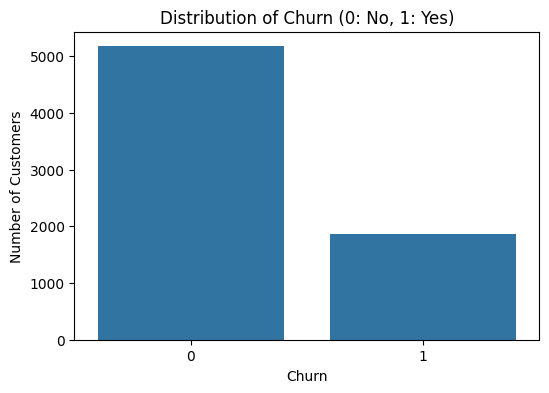

In [7]:
# 4. Basic Exploration Data Analysis (EDA)

if df is not None:
    print("\n--- Visualising Churn Distribution ---")
    plt.figure(figsize=(6, 4))
    sns.countplot(x='Churn', data=df)
    plt.title('Distribution of Churn (0: No, 1: Yes)')
    plt.xlabel('Churn')
    plt.ylabel('Number of Customers')
    plt.show()


--- Visualising Distribution of Numerical Features ---


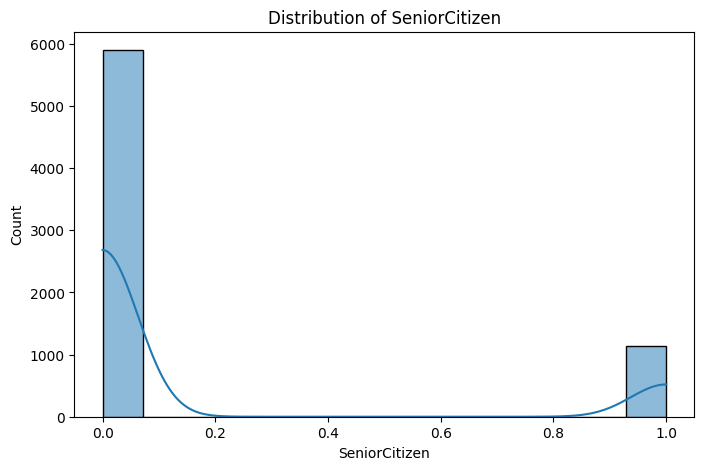

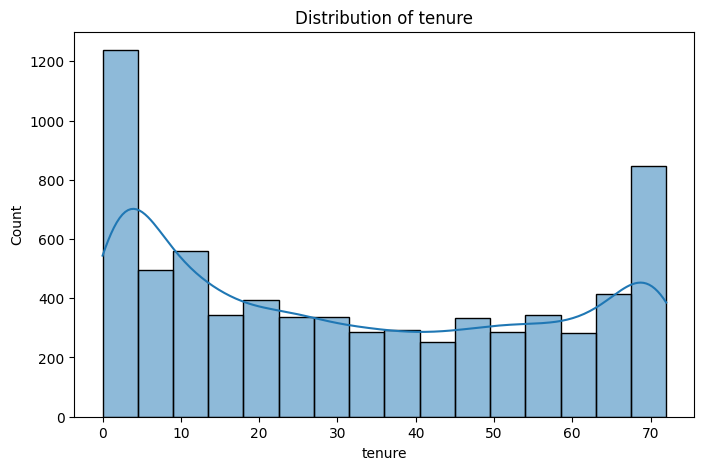

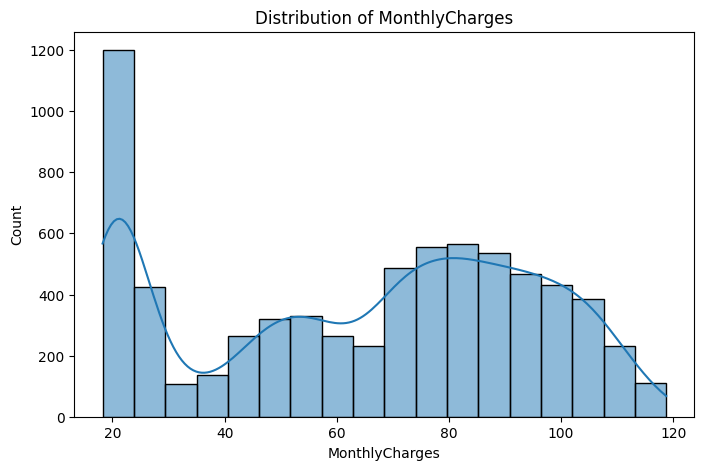

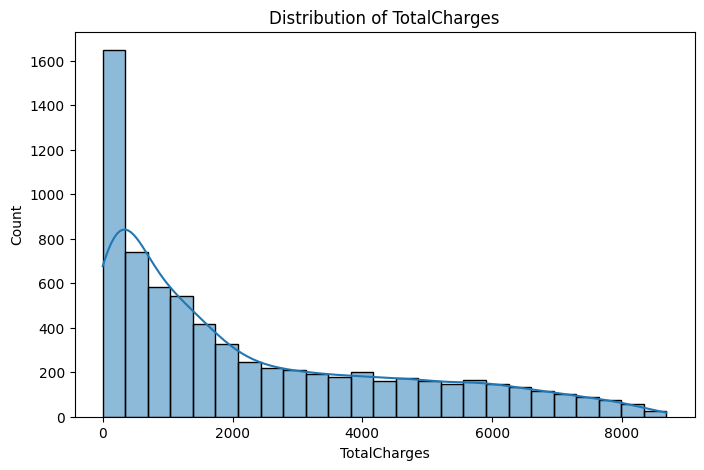

In [8]:
if df is not None:
    print("\n--- Visualising Distribution of Numerical Features ---")
    for col in numerical_features:
        # Loop through numerical features and plot distributions
        plt.figure(figsize=(8, 5))
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()


--- Visualising Churn vs. Categorical Features ---


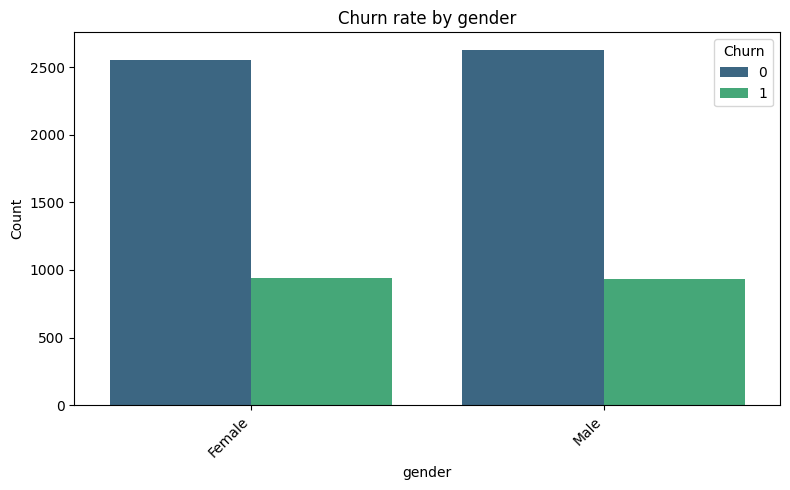

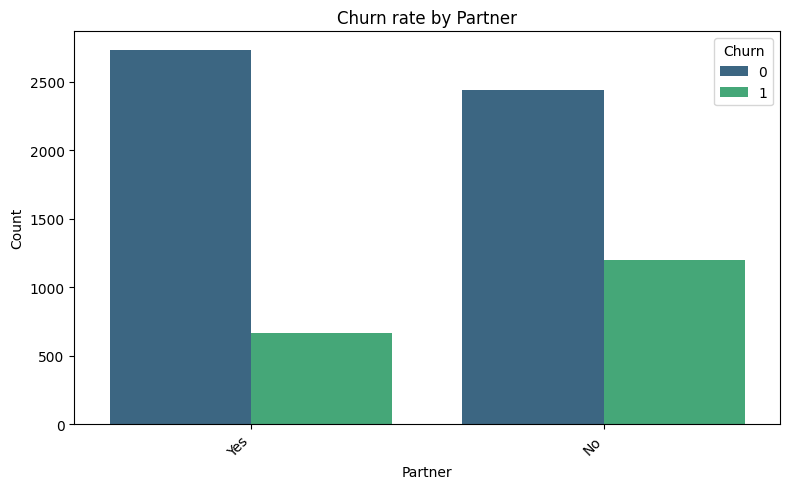

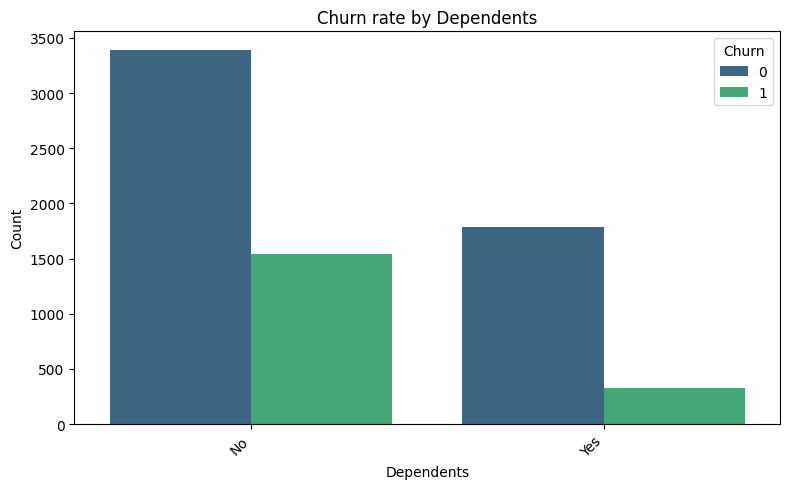

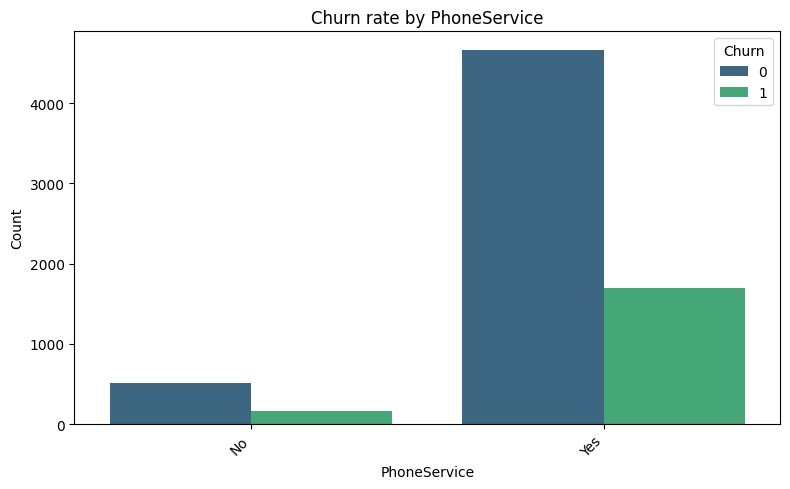

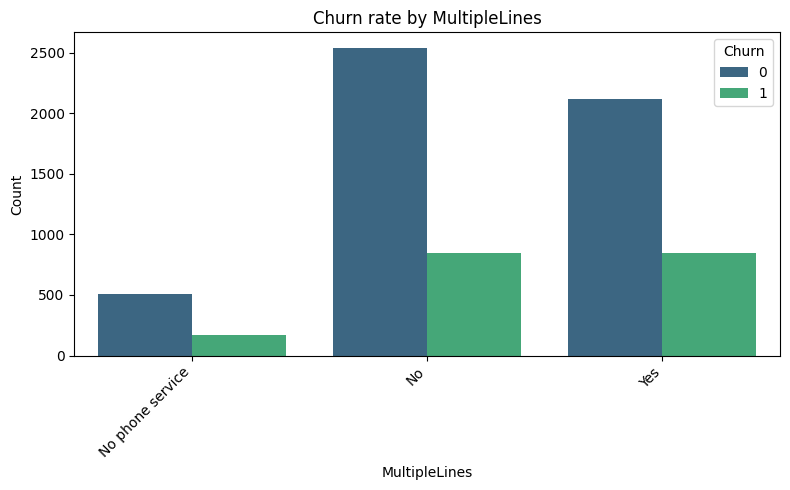

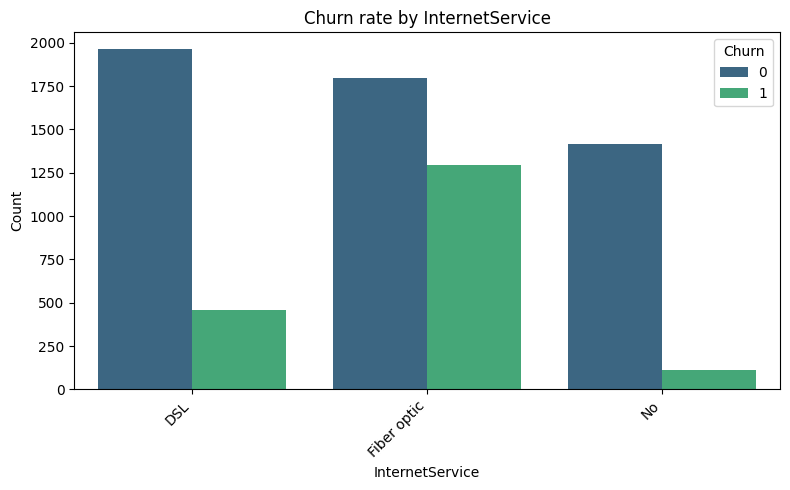

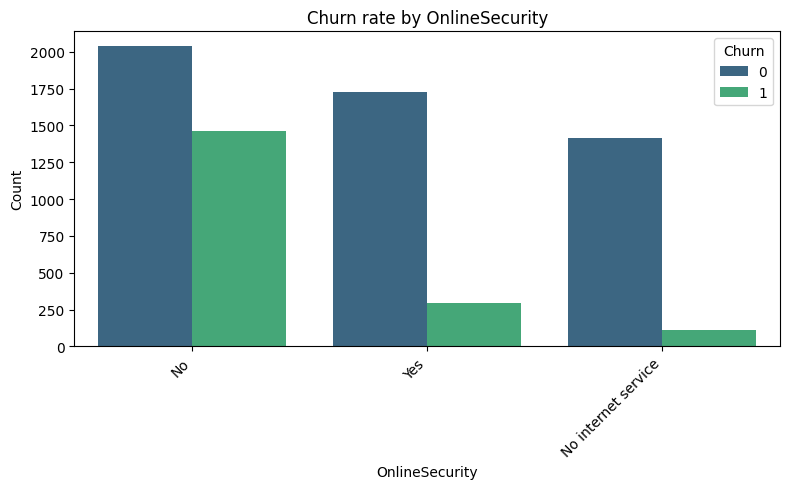

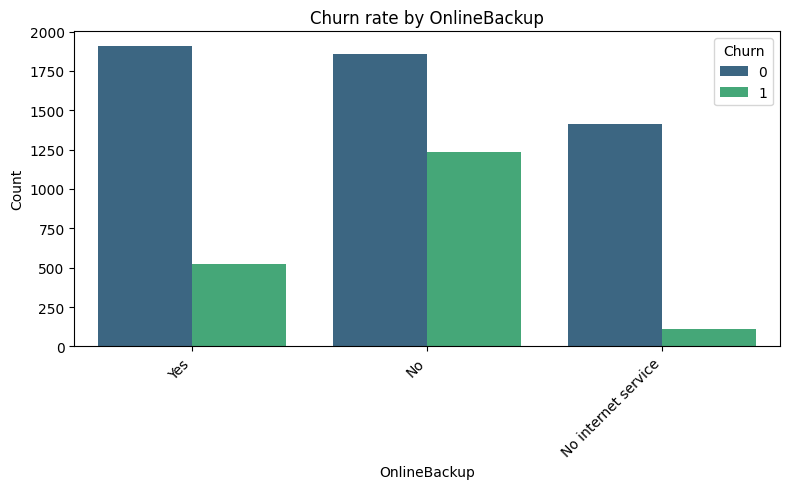

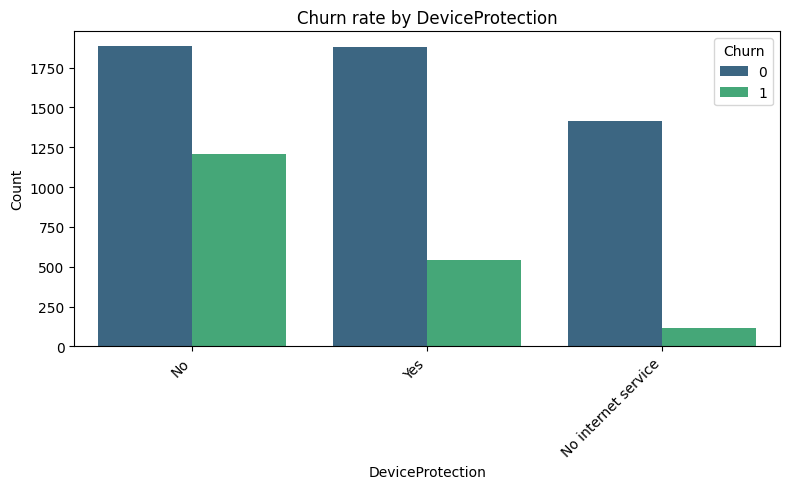

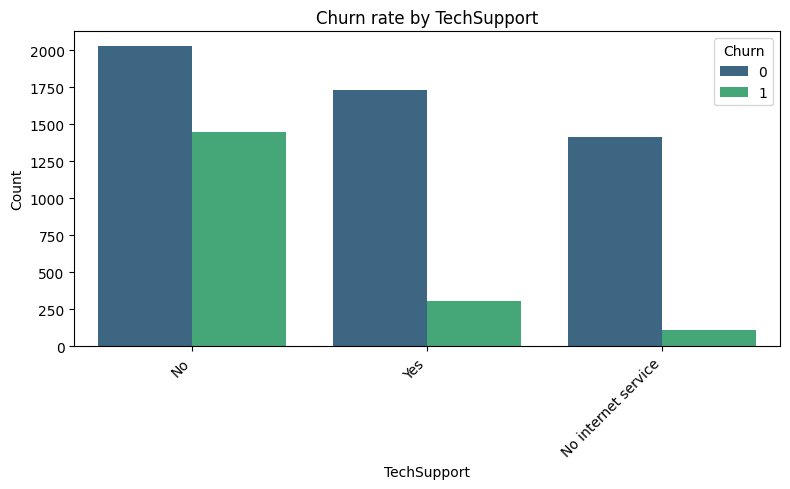

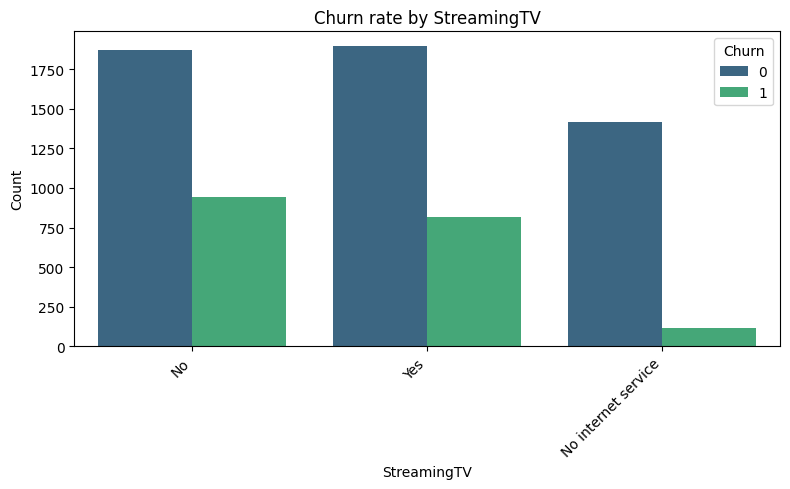

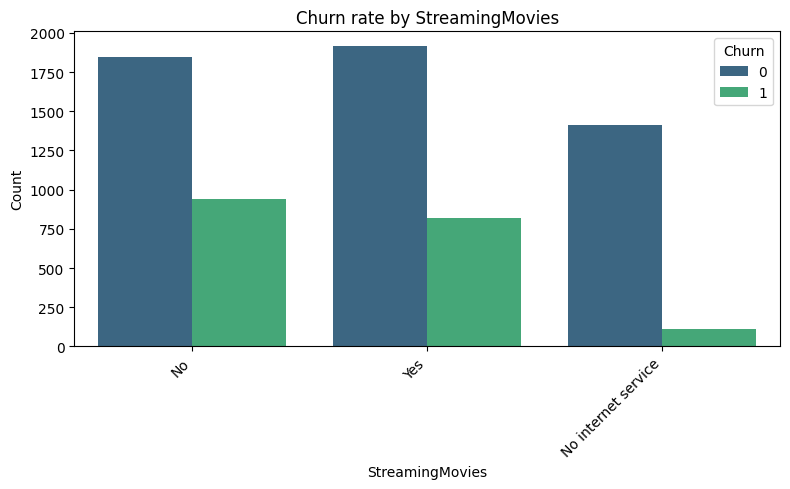

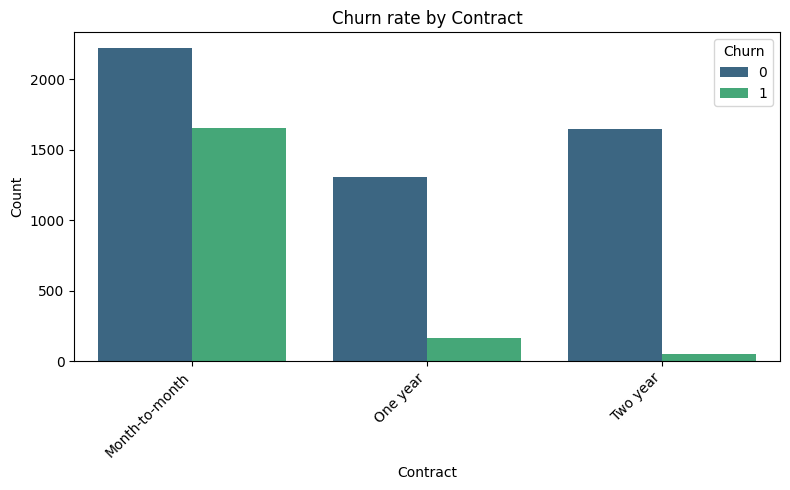

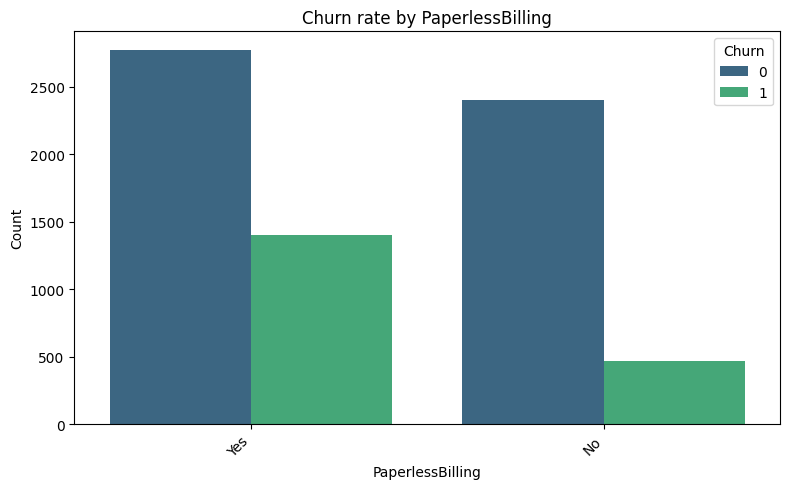

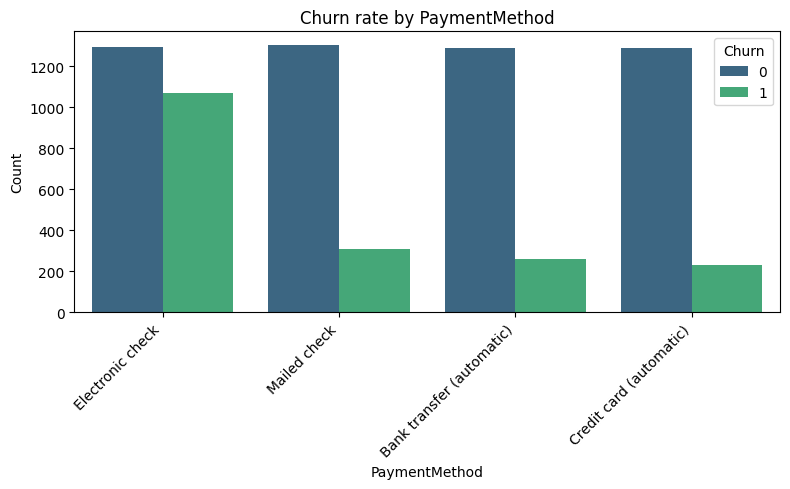

In [9]:
if df is not None:
    print("\n--- Visualising Churn vs. Categorical Features ---")
    # Loop through categorical features and plot churn rates
    for col in categorical_features:
        plt.figure(figsize=(8, 5))
        sns.countplot(x=col, hue='Churn', data=df, palette='viridis')
        plt.title(f'Churn rate by {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

In [10]:
# Phase 2: Data Preprocessing and Feature Engineering

# 1. Import Additional Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

print("Additional preprocessing libraries imported successfully.")

Additional preprocessing libraries imported successfully.


In [11]:
# 2. Define Features (X) and Target (y)
# X will contain all features except 'Churn' (independent variables)
# y will contain the 'Churn' target variable (dependent variable to predict)

X = df.drop('Churn', axis=1)
y = df['Churn']

print(f"Shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")

Shape of features (X): (7043, 19)
Shape of target (y): (7043,)


In [12]:
# 3. Identify Categorical and Numerical Features
# Re-identifying them ensures they are based on the X DataFrame and to be explicit about what is being processed

categorical_features = X.select_dtypes(include='object').columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\nCategorical features for preprocessing: {categorical_features}")
print(f"\nNumerical features for preprocessing: {numerical_features}")


Categorical features for preprocessing: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

Numerical features for preprocessing: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [13]:
# 4. Create Preprocessing Pipelines

# Numerical pipeline: StandardScaler is applied to numerical features as it transforms data to have a mean of 0 and
# a standard deviation of 1. This helps machine learning algorithms that are sensitive to feature scales e.g. Logistic
# Regression, SVMs.

numerical_transformer = Pipeline(
    steps=[
        ('scaler', StandardScaler())
    ])

# Categorical pipeline: OneHotEncoder is applied to categorical features as it converts categorical variables into a
# format that can be provided to machine learning algorithms. Each category becomes a new binary column of 0s and 1s.
# handle_unknown='ignore' prevents errors if a new, unseen category appears in the test set e.g. if a category was only
# in the training data and not in the test data.

categorical_transformer = Pipeline(
    steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

# Combine preprocessing steps using ColumnTransformer
# Allows applying different transformers to different columns of the DataFrame.
# 'num': applies numerical_transformer to numerical_features
# 'cat': applies categorical_transformer to categorical_features

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("\nPreprocessing pipelines created.")


Preprocessing pipelines created.


In [14]:
# 5. Split the Data into Training and Testing Sets
# Divides the dataset into two subsets:
# - X_train, y_train: Used for training the machine learning model.
# - X_test, y_test: Used for evaluating the trained model on unseen data.
# test_size=0.2: 20% of the data will be used for testing, 80% for training.
# random_state=42: Ensures reproducibility so that running the same code multiple times yields the same split.
# stratify=y: Crucial for classification problems, especially with imbalanced classes (such as churn) - to ensure that the
# proportion of 'Yes' (churned) and 'No' (non-churned) customers is approximately the same in both the training and testing
# sets as it is in the original dataset.

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"\nTraining set shape (X_train): {X_train.shape}")
print(f"Testing set shape (X_test): {X_test.shape}")
print(f"Training target shape (y_train): {y_train.shape}")
print(f"Testing target shape (y_test): {y_test.shape}")


Training set shape (X_train): (5634, 19)
Testing set shape (X_test): (1409, 19)
Training target shape (y_train): (5634,)
Testing target shape (y_test): (1409,)


In [15]:
# 6. Apply Preprocessing to Training and Testing Data
# fit_transform on X_train: The preprocessor learns the scaling parameters (mean, std dev) and one-hot encoding
# categories from the training data, and then transform X_train.
# transform on X_test: The preprocessor uses the learned parameters from the training data to transform the test data.
# This prevents data leakage from the test set into the training process.

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Get feature names after one-hot encoding for better interpretability later by constructing the new column names after
# one-hot encoding, which can be many.

feature_names = []

for name, transformer, features in preprocessor.transformers_:
    # Keep the names for numerical features
    if name == 'num':
        feature_names.extend(features)

    # Get the new one-hot encoded names for categorical features
    elif name == 'cat':
        # .named_steps['onehot']: Accesses the OneHotEncoder within the categorical_transformer pipeline.
        # .get_feature_names_out(features): Gets the new column names e.g. 'gender_Female', 'gender_Male'
        ohe_feature_names = transformer.named_steps['onehot'].get_feature_names_out(features)
        feature_names.extend(ohe_feature_names)

# Convert processed NumPy arrays back to Pandas DataFrames for easier inspection and future use to make easier to view
# the data with column headers.

X_train_processed_df = pd.DataFrame(X_train_processed, columns=feature_names, index=X_train.index)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=feature_names, index=X_test.index)

print("\nData preprocessing complete.")
print(f"Shape of processed training features: {X_train_processed_df.shape}")
print(f"Shape of processed testing features: {X_test_processed_df.shape}")
print("\nFirst 5 rows of processed training data (showing new features):")
print(X_train_processed_df.head())
print("\nDescriptive statistics of processed training data:")
print(X_train_processed_df.describe())


Data preprocessing complete.
Shape of processed training features: (5634, 45)
Shape of processed testing features: (1409, 45)

First 5 rows of processed training data (showing new features):
      SeniorCitizen    tenure  MonthlyCharges  TotalCharges  gender_Female  \
3738      -0.441773  0.102371       -0.521976     -0.262257            0.0   
3151      -0.441773 -0.711743        0.337478     -0.503635            0.0   
4860      -0.441773 -0.793155       -0.809013     -0.749883            0.0   
3867      -0.441773 -0.263980        0.284384     -0.172722            1.0   
3810      -0.441773 -1.281624       -0.676279     -0.989374            0.0   

      gender_Male  Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  \
3738          1.0         1.0          0.0            1.0             0.0   
3151          1.0         0.0          1.0            0.0             1.0   
4860          1.0         0.0          1.0            0.0             1.0   
3867          0.0         0.0  